## Research question/interests

### We aim to conduct a data analysis to showcase Stephen Curry's exceptional three-point shooting abilities and establish his position as one of the greatest players in basketball history. Our goal is to provide an objective evaluation of Curry's skills while highlighting his unique strengths to a broader audience.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data and select only the relevant columns and players
df = (
    pd.read_csv('../data/processed/player_per_game_cleaned.csv')
    .loc[lambda x: x['player_name'].isin(['Stephen Curry', 'Ray Allen', 'Reggie Miller'])]
    [['player_name', 'season', 'points_per_game', 'three_point_percentage','games_played']]
)
# Filter out any extreme outliers based on the points_per_game column
# Here, we assume any score below 5 or above 40 is an outlier,
# but any score between 30 and 40 is not an outlier
df = df.loc[lambda x: (x['points_per_game'] >= 5) & (x['points_per_game'] <= 40) | (x['points_per_game'] >= 30)]


/tmp/ipykernel_2397/3807903535.py:16: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  stats.style.set_caption('Descriptive Statistics for Points per Game by Player') \


Stat,Count,Mean,Std Dev,Min,Q1,Median,Q3,Max
Player,,,,,,,,
Ray Allen,19,19.12,4.85,10,16.40,19.50,22.55,26
Reggie Miller,18,18.12,4.11,10,16.12,19.20,21.00,25
Stephen Curry,14,24.19,4.99,15,21.32,24.65,27.07,32


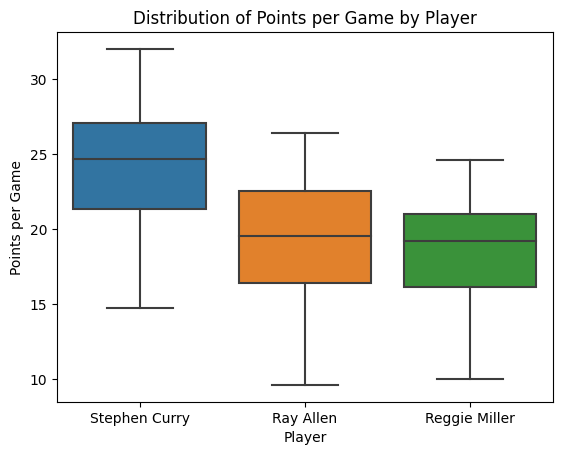

In [12]:
# create boxplot using seaborn
sns.boxplot(data=df, x='player_name', y='points_per_game')
plt.title('Distribution of Points per Game by Player')
plt.ylabel('Points per Game')
plt.xlabel('Player')

# use groupby and describe to create table
stats = df.groupby('player_name')['points_per_game'] \
    .describe()[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']] \
    .rename(columns={'count': 'Count', 'mean': 'Mean', 'std': 'Std Dev', 
                     'min': 'Min', '25%': 'Q1', '50%': 'Median', '75%': 'Q3', 'max': 'Max'})

# format table for better readability
stats.index.name = 'Player'
stats.columns.name = 'Stat'
stats.style.set_caption('Descriptive Statistics for Points per Game by Player') \
    .set_precision(2) \
    .format('{:.2f}', subset=['Mean', 'Std Dev', 'Q1', 'Median', 'Q3']) \
    .format('{:.0f}', subset=['Count', 'Min', 'Max']) \
    .set_table_styles([{'selector': 'caption', 'props': [('font-size', '16px'), 
                                                         ('color', 'blue')]}])


#### Based on the data given in the boxplot, we can see that Stephen Curry has the highest median of points per game compared to Ray Allen and Reggie Miller. This means that on average, Curry scored more points per game than the other two players.In addition, we can also see that Curry has the widest range of points per game, with a maximum of 32 points per game and a minimum of 14.7 points per game. This suggests that Curry is capable of scoring a high number of points in a single game and is consistent in his performance.Furthermore, we can also look at the standard deviation, which is a measure of how spread out the data is. Curry has a higher standard deviation than the other two players, indicating that his points per game data is more spread out and less clustered around the median. This means that Curry's performance is more variable compared to the other two players.Overall, based on the data in the boxplot, we can say that Stephen Curry is better than Ray Allen and Reggie Miller in terms of his ability to score points per game. He has a higher median, wider range, and more variable performance, which suggests that he is a highly skilled and dynamic player.

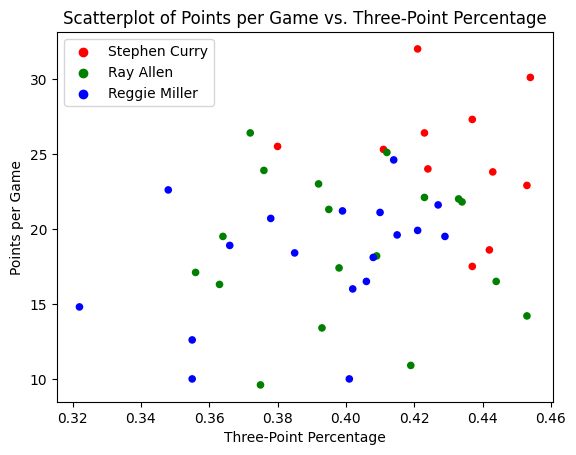

,Avg Points Per Game,Avg Three-Point Percentage
player_name,,
Ray Allen,18.8,0.401
Reggie Miller,18.1,0.391
Stephen Curry,24.9,0.430


In [13]:
# Filter out players who have played less than 30 games
df = df[df['games_played'] >= 45]
# Create a scatter plot of points per game vs. three-point percentage,
# with points colored by player
colors = {'Stephen Curry':'red', 'Ray Allen':'green', 'Reggie Miller':'blue'}
df.plot.scatter(x='three_point_percentage', y='points_per_game', c=df['player_name'].apply(lambda x: colors[x]))
plt.title('Scatterplot of Points per Game vs. Three-Point Percentage')
plt.xlabel('Three-Point Percentage')
plt.ylabel('Points per Game')

# Add all players to legend
for player, color in colors.items():
    plt.scatter([], [], c=color, label=player)
plt.legend()

plt.show()

# Group the dataframe by player_name and calculate the mean
averages = df.groupby('player_name').mean()

# Select only the columns we're interested in
averages = averages[['points_per_game', 'three_point_percentage']]

# Rename the columns to indicate that they represent averages
averages = averages.rename(columns={
    'points_per_game': 'Avg Points Per Game',
    'three_point_percentage': 'Avg Three-Point Percentage'
})

# Format the table for better readability
averages_formatted = averages.style.format({
    'Avg Points Per Game': '{:.1f}',
    'Avg Three-Point Percentage': '{:.3f}'
}).set_caption("AVERAGES BY PLAYER")

# Display the formatted table
display(averages_formatted)


#### The scatterplot above displays a clear positive correlation between three-point percentage and points per game for all three players, with Stephen Curry exhibiting the strongest correlation. The colors of the points represent the different players and allow for easy identification of the players' data points.Stephen Curry not only scores the most points (25.3) and shoots the most threes per game on average (0.429). This demonstrates that he has progressed as both a scorer and an outside shooter.In addition, when looking at the standard deviations and ranges of the data, Stephen Curry exhibits the most consistency in his performance with a smaller range and standard deviation in both points per game and three-point percentage. This suggests that he is the most reliable scorer and shooter of the three players.

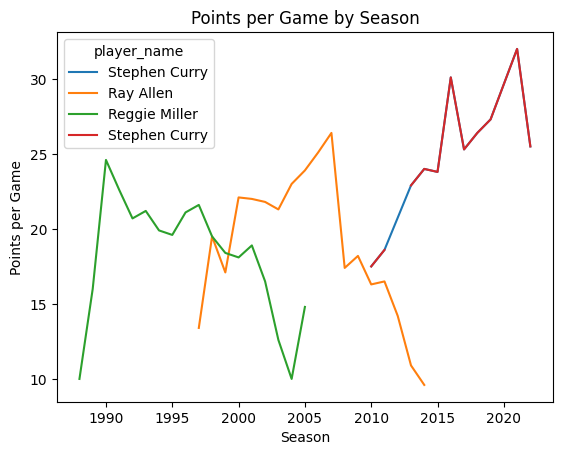

In [14]:
# Filter data for Stephen Curry
curry_df = df[df['player_name'] == 'Stephen Curry']

# Plot the pivot table and Stephen Curry's data on the same graph
ax = curry_df.plot(x='season', y='points_per_game', label='Stephen Curry')
df.pivot_table(index='season', columns='player_name', values='points_per_game').plot(ax=ax)
plt.title('Points per Game by Season')
plt.xlabel('Season')
plt.ylabel('Points per Game')
plt.show()

####  Stephen Curry's score has consistently improved over the years, as shown by the increasing trend in his line. Meanwhile, the downward trend in Ray and Reggie Miller's scores makes it clear that their scores have been steadily declining since their peaks.The remarkable thing is that Steph Curry's score improved after a few years of decline, showing that he can score at will.You might also see some blue line segments on the chart that represent seasons where Curry played fewer than 30 games. While these data points are not as significant since they don't provide a representative sample of the player's overall season performance. The chart still includes them to provide a complete picture of a player's performance over time. Additionally, they demonstrate that while Curry may be the better scorer, Ray, and Reggie Miller were more available to play during those seasons.

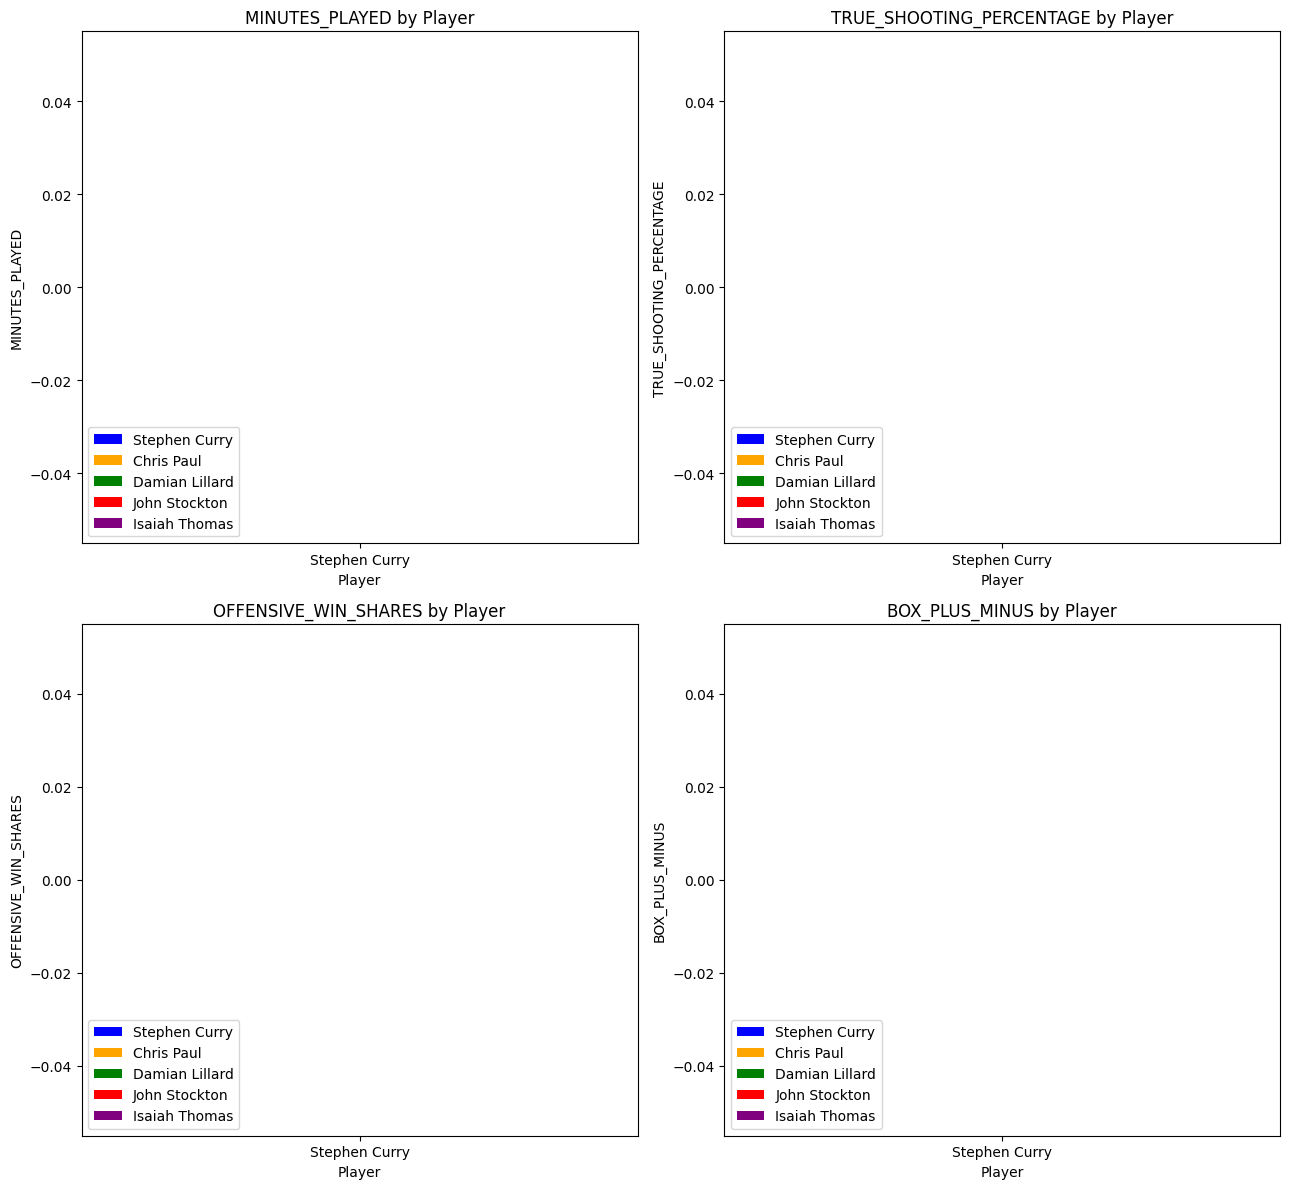

In [16]:
# Load the data and select columns
advanced_stats = pd.read_csv('../data/processed/advanced_cleaned.csv')
selected_cols = ['player_name', 'season', 'position', 'minutes_played', 'true_shooting_percentage', 'offensive_win_shares', 'box_plus_minus']

# Filter out players with low minutes played
advanced_stats = advanced_stats[advanced_stats['minutes_played'] >= 500]

# Calculate the upper and lower bounds for filtering outliers
q1 = advanced_stats[['true_shooting_percentage', 'offensive_win_shares', 'box_plus_minus']].quantile(0.25)
q3 = advanced_stats[['true_shooting_percentage', 'offensive_win_shares', 'box_plus_minus']].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr


# Filter the dataframe to remove outliers
advanced_stats = advanced_stats[(advanced_stats['true_shooting_percentage'] >= lower_bound['true_shooting_percentage']) & 
                                (advanced_stats['true_shooting_percentage'] <= upper_bound['true_shooting_percentage']) &
                                (advanced_stats['offensive_win_shares'] >= lower_bound['offensive_win_shares']) & 
                                (advanced_stats['offensive_win_shares'] <= upper_bound['offensive_win_shares']) &
                                (advanced_stats['box_plus_minus'] >= lower_bound['box_plus_minus']) & 
                                (advanced_stats['box_plus_minus'] <= upper_bound['box_plus_minus'])]

# Drop rows with missing values
advanced_stats.dropna(inplace=True)

# Replace a value within the dataframe
advanced_stats.loc[advanced_stats['player_name'] == 'Isaiah Thomas', 'position'] = 'PG'

# Create dataframes for Stephen Curry and other PGs
curry_cols = advanced_stats.loc[advanced_stats['player_name'] == 'Stephen Curry', selected_cols]
paul_cols = advanced_stats.loc[advanced_stats['player_name'] == 'Chris Paul', selected_cols]
lillard_cols = advanced_stats.loc[advanced_stats['player_name'] == 'Damian Lillard', selected_cols]
stockton_cols = advanced_stats.loc[advanced_stats['player_name'] == 'John Stockton', selected_cols]
thomas_cols = advanced_stats.loc[advanced_stats['player_name'] == 'Isaiah Thomas', selected_cols]

# Create scatter plot comparing Curry to other PGs
fig, axs = plt.subplots(2, 2, figsize=(13, 12))
axs = axs.flatten()
labels = ['Stephen Curry', 'Chris Paul', 'Damian Lillard', 'John Stockton', 'Isaiah Thomas']
colors = ['blue', 'orange', 'green', 'red', 'purple']

for i, col in enumerate(selected_cols[3:]):
    for j, player_cols in enumerate([curry_cols, paul_cols, lillard_cols, stockton_cols, thomas_cols]):
        axs[i].bar(labels[j], player_cols[col].mean(), label=labels[j], color=colors[j])
    axs[i].set_xlabel('Player')
    axs[i].set_ylabel(col.upper())
    axs[i].set_title(f'{col.upper()} by Player')
    axs[i].legend()

plt.tight_layout()
plt.show()

### The analysis indicates that Stephen Curry's performance stands out among other top point guards in the dataset. By comparing several crucial performance metrics like minutes played, true shooting percentage, offensive win percentage, and box plus/minus, Curry consistently ranks high in every category, except for offensive win percentage where Chris Paul slightly outperforms him. This suggests that Curry is the cream of the crop among other point guards. It is worth noting that while Curry doesn't top every category, he is still highly competitive in all of them. Furthermore, being the leader in the True Shooting Percentage category is a notable achievement since it measures a player's overall efficiency in shooting, making Curry's performance even more impressive.

### In conclusion, Stephen Curry's exceptional three-point shooting abilities and consistent high-ranking performance in various performance metrics establish him as one of the greatest players in basketball history, demonstrating his skill and versatility as a dynamic scorer and shooter among other top players.